### animate plot: precompute frames and display afterwards

<IPython.core.display.Javascript object>


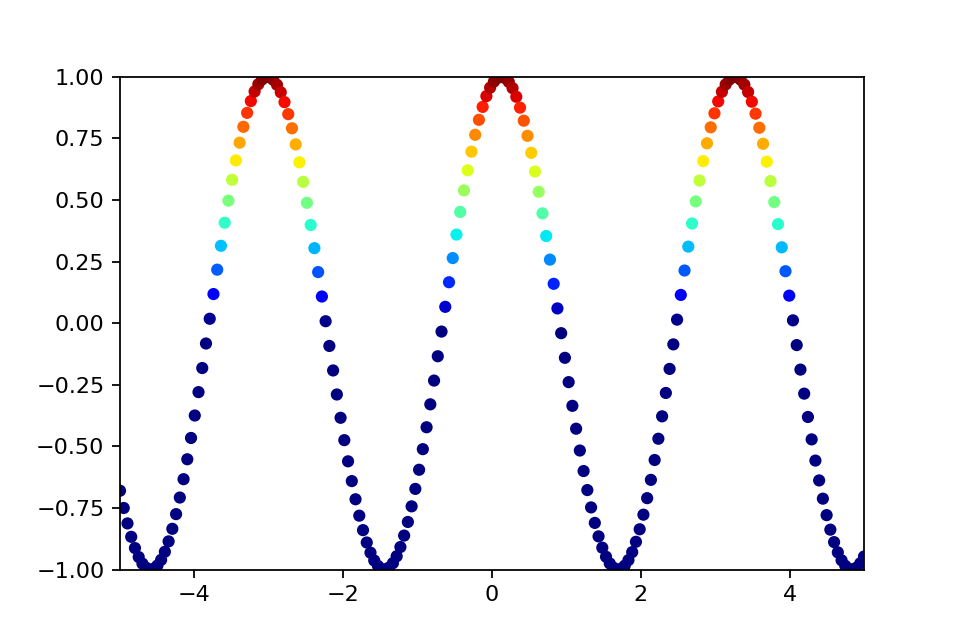

In [11]:
#animated precomputed plot 2d (movement)
%reset -f
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as Animation
import numpy as np
from matplotlib import cm

#data
x = np.linspace(-5, 5, 200)
y = lambda aa,x: np.sin(2*x+aa)

#animation setup
frames = 20
aa = np.linspace(0,2*np.pi,frames)
fps = 2

#plot
fig = plt.figure(figsize=(6,4), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)

#plot all frames and store in array
allframes = []
for ii in range(frames):
    forcolor = cm.jet(y(aa[ii],x))
    oneframe = ax.scatter(x, y(aa[ii],x), color=forcolor, s=20)
    #oneframe, = ax.plot(x, y(aa[ii],x), color="blue", linewidth=4) #alternative
    allframes.append([oneframe])

#plot range
ax.set_xlim(-5,5)
ax.set_ylim(-1,1)

#animate plotted frames
ani = Animation.ArtistAnimation(fig, allframes, interval=1000/fps, blit=True)

plt.show()

<IPython.core.display.Javascript object>


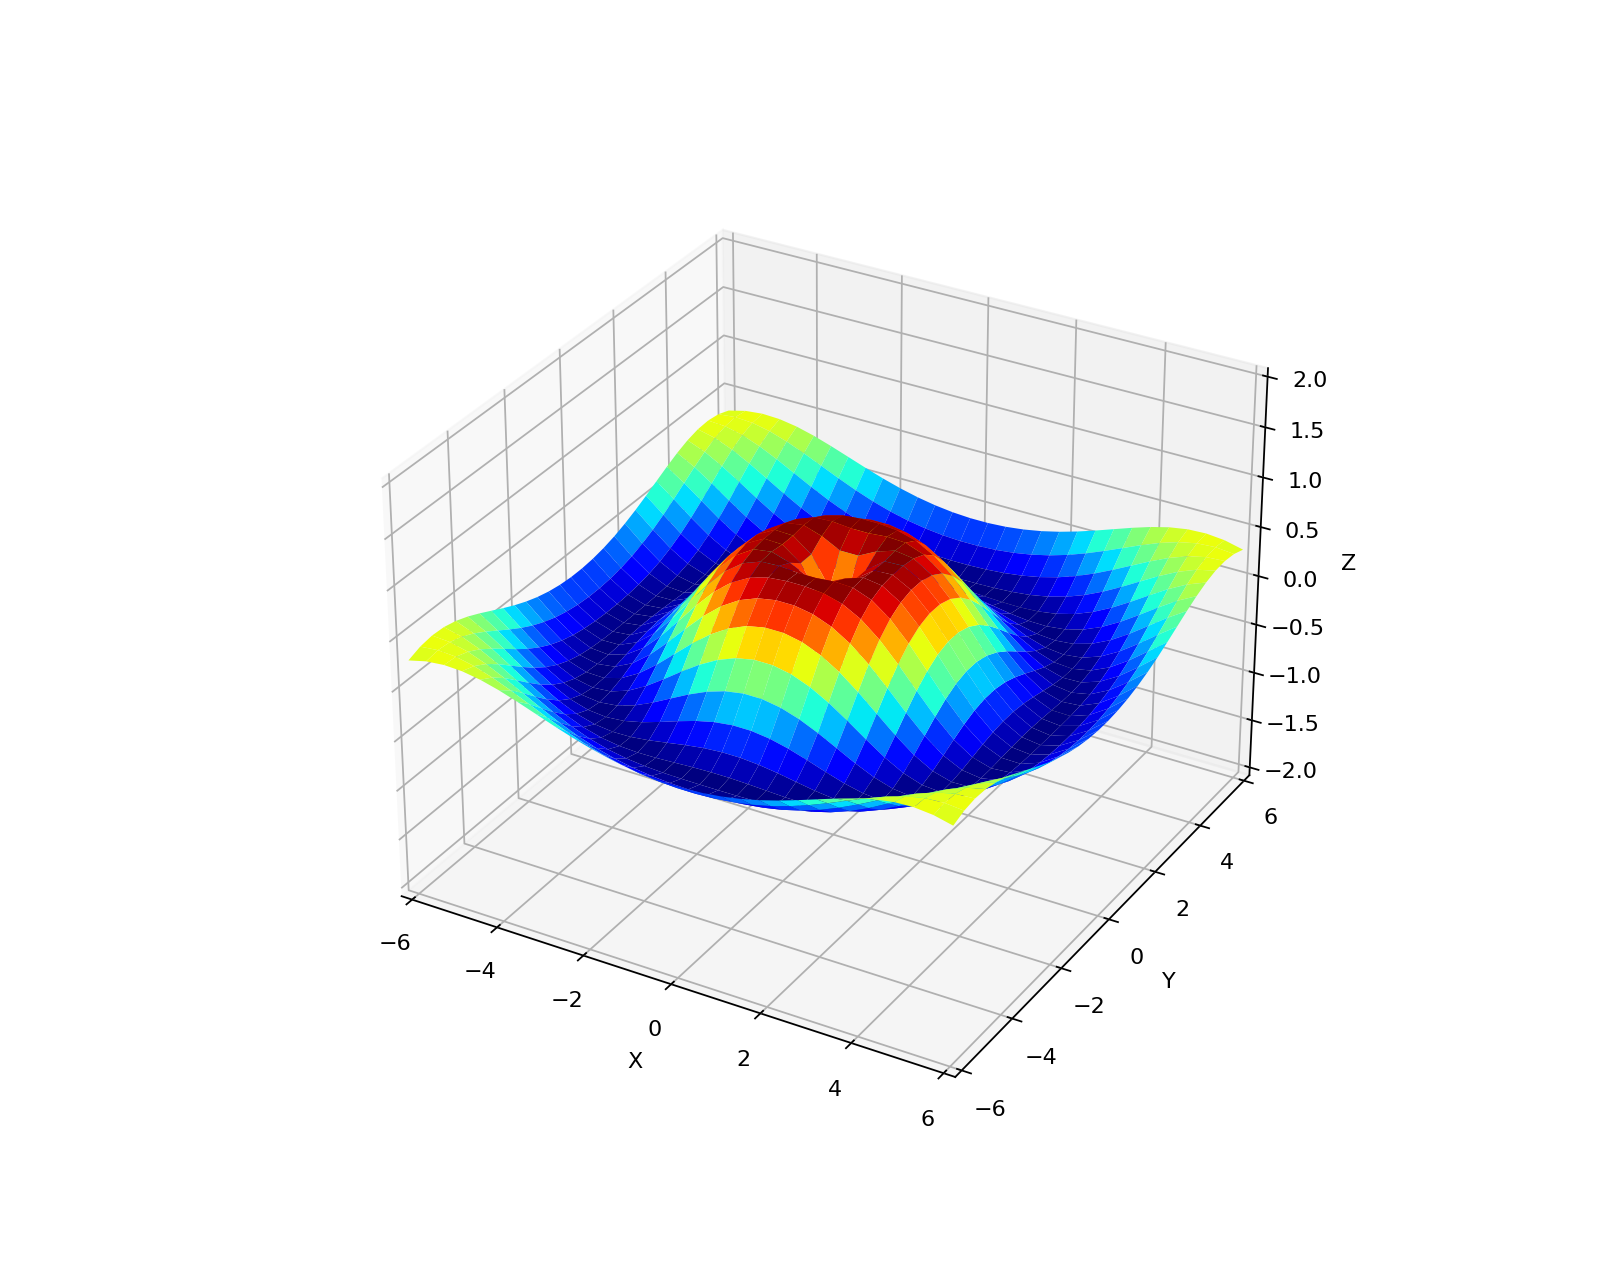

In [3]:
#animated precomputed plot 3d (movement)
%reset -f
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.animation as Animation
import numpy as np

#data
x0 = np.linspace(-6,6, 30)
y0 = np.linspace(-6,6, 30)
xx, yy = np.meshgrid(x0, y0)
rr = np.sqrt(np.multiply(xx,xx)+np.multiply(yy,yy))
zz = lambda aa : np.divide(np.cos(rr-aa),np.sqrt(rr))

#animation setup
frames = 20
aa = np.linspace(0,2*np.pi,frames)
fps = 2

#plot setup
fig = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111, projection='3d')

#plot all frames and store in array
allframes = []
for ii in range(frames):
    oneframe = ax.plot_surface(xx,yy,zz(aa[ii]), cmap=cm.jet, linewidth=2)
    allframes.append([oneframe])

#plot range
ax.set_xlim([-6, 6])
ax.set_xlabel('X')
ax.set_ylim([-6, 6])
ax.set_ylabel('Y')
ax.set_zlim([-2, 2])
ax.set_zlabel('Z')

#animate plotted frames
ani = Animation.ArtistAnimation(fig, allframes, interval=1000/fps, blit=True)

plt.show()

### animate plot: call function to redraw plot in real time

<IPython.core.display.Javascript object>


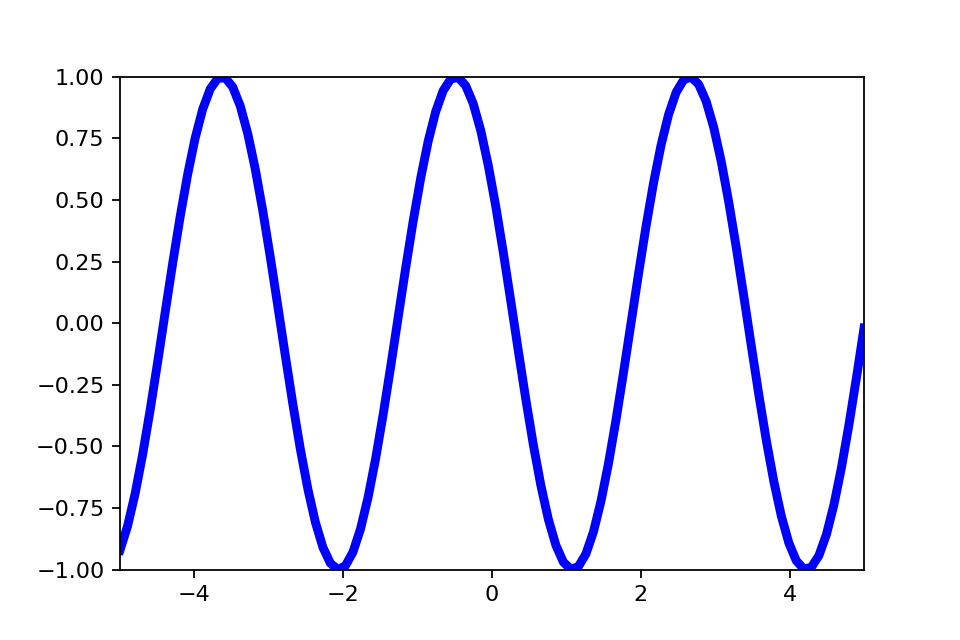

In [15]:
#animated plot 2D (movement)
%reset -f
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as Animation
import numpy as np

#data
x = np.linspace(-5, 5, 100)
y = lambda aa,x: np.sin(2*x+aa/(3*np.pi))

#plot
fig = plt.figure(figsize=(6,4), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
lineOBJ, = ax.plot(x,y(0,x),color="blue",label="Funktion", linewidth=4)

#plot range
ax.set_xlim(-5,5)
ax.set_ylim(-1,1)

#animation function with parameter aa
def animate(aa,x,y,function):
    newY = y(aa,x)#function
    #lineOBJ.set_xdata()#set x-data
    lineOBJ.set_ydata(newY)#set y-data
    #lineOBJ.set_3d_properties()#set z-data


#animation composed of:
#plot figure, animated function, array with animation steps for function, time steps in ms
#to draw only new sections set: blit=True
ani = Animation.FuncAnimation(fig=fig, func=animate, frames=60, fargs=(x,y,lineOBJ,), interval=50, blit=False)

plt.show()

<IPython.core.display.Javascript object>


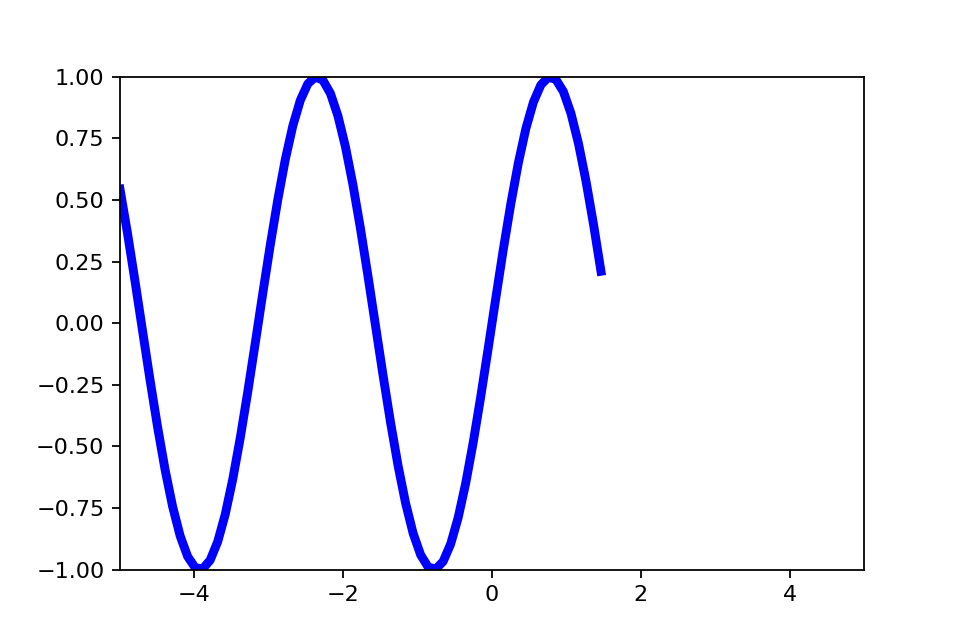

In [16]:
#animated plot 2D (update)
%reset -f
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as Animation
import numpy as np

#data
x = np.linspace(-5, 5, 100)
y = np.sin(2*x)


#plot
fig = plt.figure(figsize=(6,4), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
lineOBJ, = ax.plot(x[0],y[0],color="blue",label="Funktion", linewidth=4)

#plot range
ax.set_xlim(-5,5)
ax.set_ylim(-1,1)

#animation function
def animate(aa,x,y,function):
    newX = x[0:aa]
    newY = y[0:aa]
    lineOBJ.set_xdata(newX)#set x-data
    lineOBJ.set_ydata(newY)#set y-data
    #lineOBJ.set_3d_properties()#set z-data


#animation composed of:
#plot figure, animated function, array with animation steps for function, time steps in ms
#to draw only new sections set: blit=True
ani = Animation.FuncAnimation(fig=fig, func=animate, frames=101, fargs=(x,y,lineOBJ,), interval=50, blit=True)

plt.show()

<IPython.core.display.Javascript object>


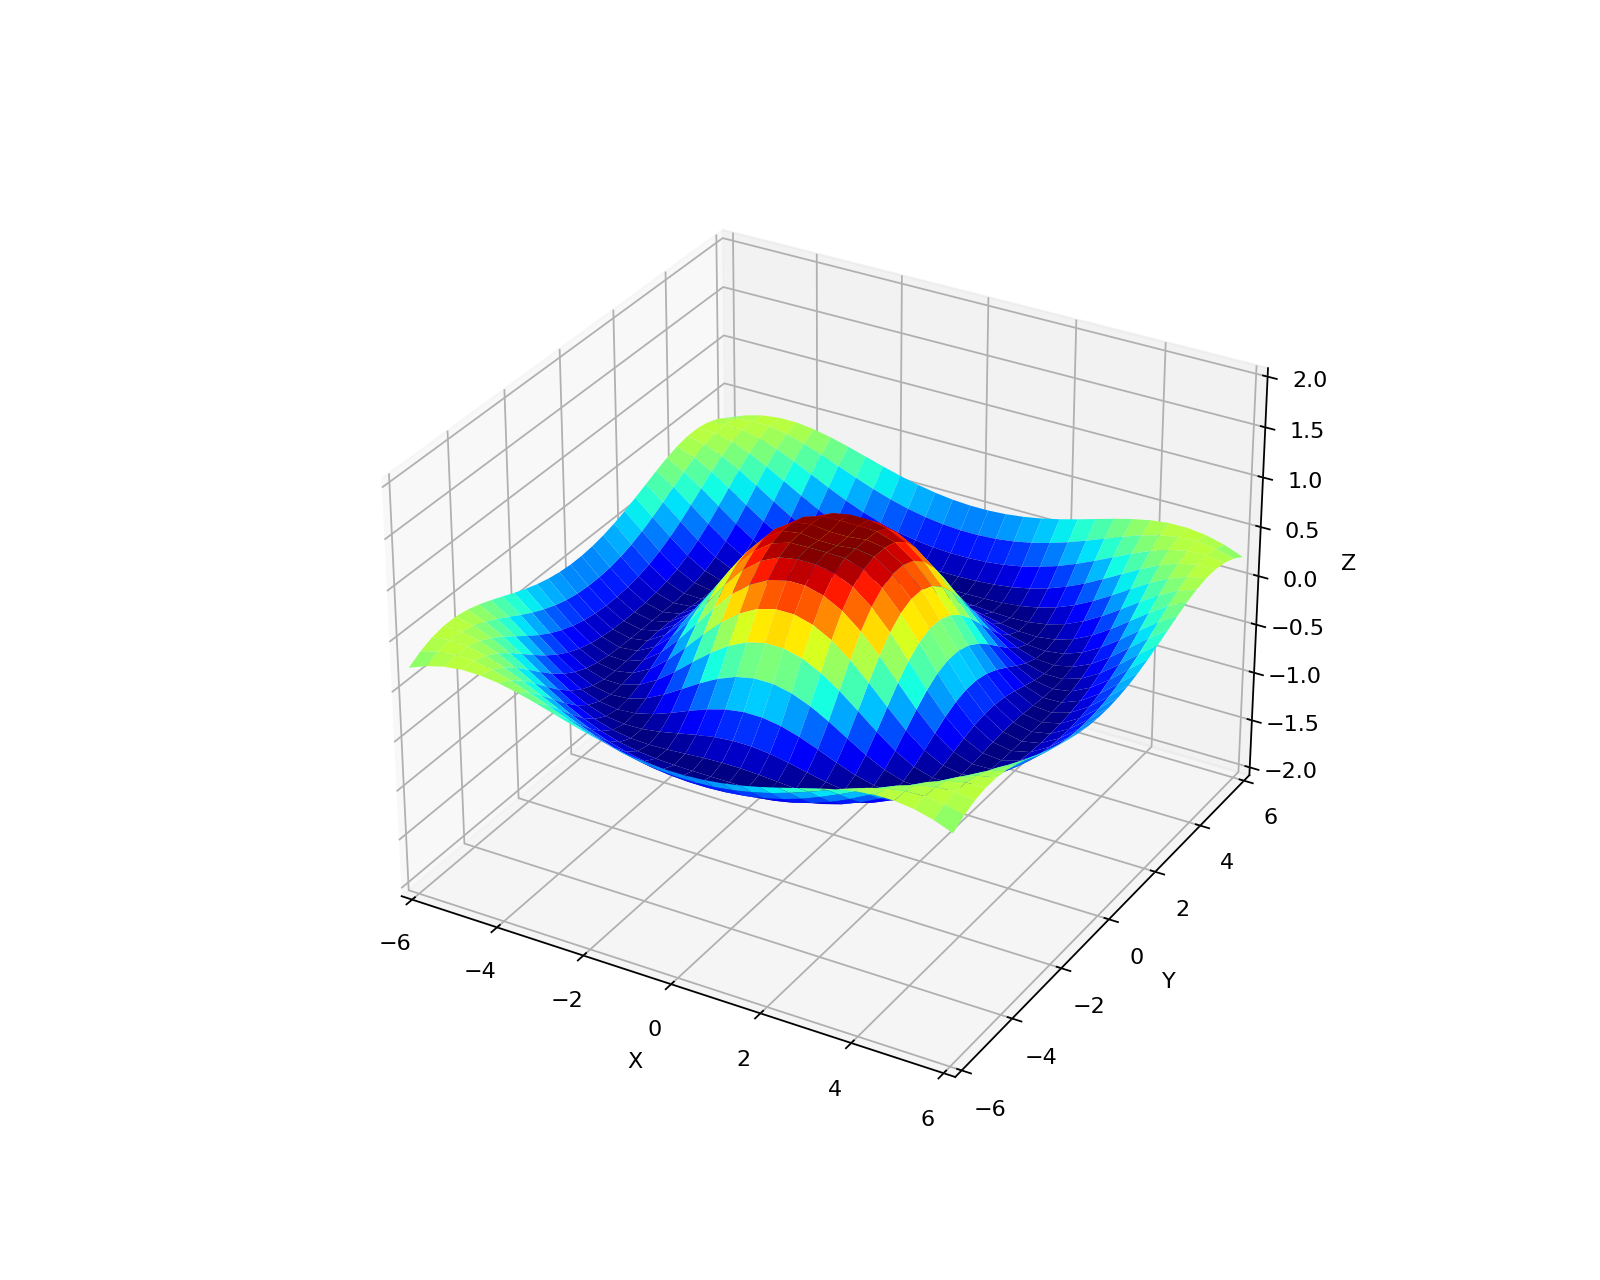

In [41]:
#animated plot 3D (time dependent movement)
%reset -f
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.animation as Animation
import numpy as np

#data
x0 = np.linspace(-6,6, 30)
y0 = np.linspace(-6,6, 30)
xx, yy = np.meshgrid(x0, y0)
rr = np.sqrt(np.multiply(xx,xx)+np.multiply(yy,yy))
zz = lambda aa : np.divide(np.cos(rr-aa/(6*np.pi)),np.sqrt(rr))

#plot
fig = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111, projection='3d')
lineOBJ = [0]
lineOBJ[0] = ax.plot_surface(xx,yy,zz(0), cmap=cm.jet, linewidth=2)#, alpha=0.8)
#lineOBJ[0] = ax.plot_wireframe(xx,yy,zz(0), linewidth=1, antialiased=True, alpha=0.8)
#fig.colorbar(forcolorbar1, shrink=0.8, aspect=10)


#plot range
ax.set_xlim([-6, 6])
ax.set_xlabel('X')
ax.set_ylim([-6, 6])
ax.set_ylabel('Y')
ax.set_zlim([-2, 2])
ax.set_zlabel('Z')

#animation function
def animate(aa, zz, function):
    lineOBJ[0].remove()
    lineOBJ[0] = ax.plot_surface(xx,yy,zz(aa), cmap=cm.jet, linewidth=2)
    #---
    #lineOBJ[0].remove()
    #lineOBJ[0] = ax.plot_wireframe(xx,yy,zz(aa), linewidth=1, antialiased=True, alpha=0.8)
    #---
    #lineOBJ.set_3d_properties()#set z-data
    #function.set_xdata()#set x-data
    #function.set_ydata()#set y-data


#animation composed of:
#plot figure, animated function, array with animation steps for function, time steps in ms
#to draw only new sections set: blit=True
ani = Animation.FuncAnimation(fig=fig, func=animate, frames=120, fargs=(zz,lineOBJ), interval=100, blit=False)

plt.show()

<IPython.core.display.Javascript object>


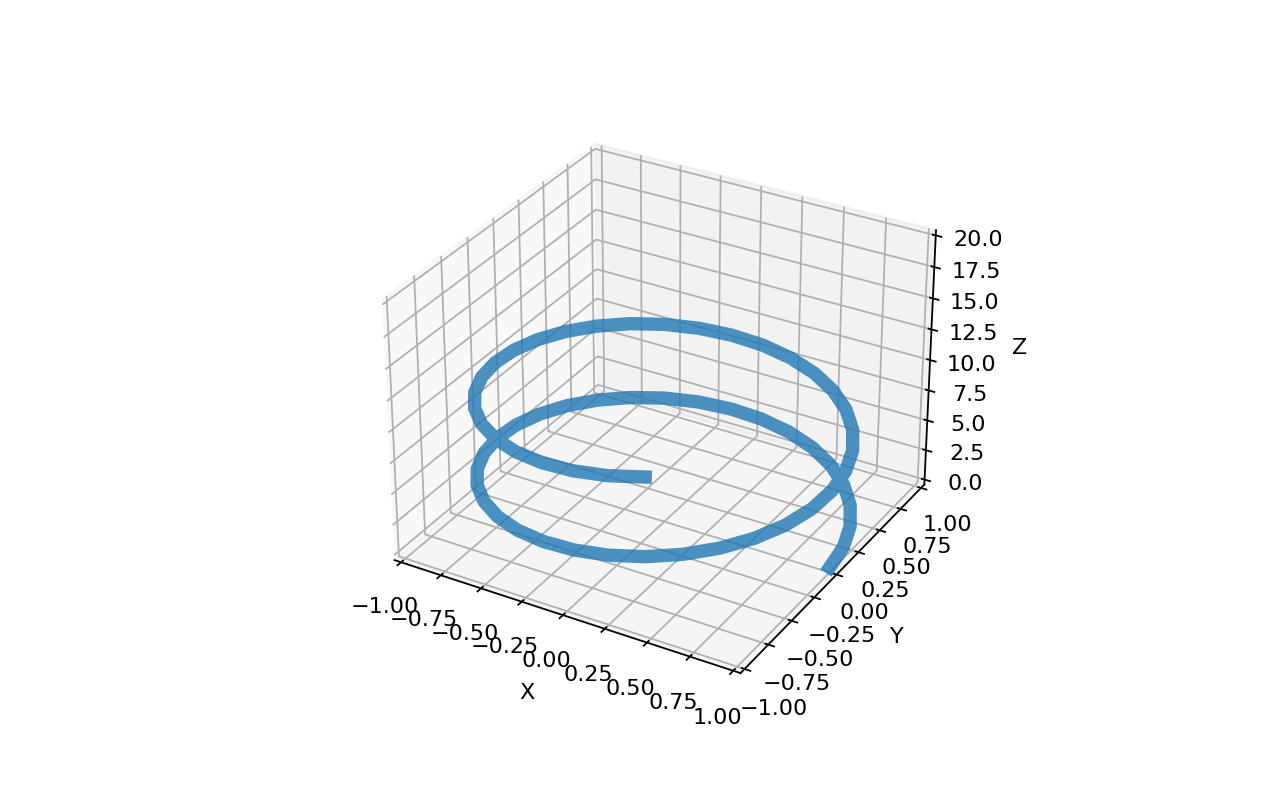

In [21]:
#animated plot 3D (update)
%reset -f
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as Animation
import numpy as np

#data
phi = np.linspace(0,6*np.pi,100)
data = np.array([np.cos(phi), np.sin(phi), phi])

#plot
fig = plt.figure(figsize=(8,5), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111, projection='3d')
#plot needs two data points at least !
lineOBJ, = ax.plot(data[0, 0:1], data[1, 0:1], data[2, 0:1], linewidth='6', alpha=0.8)

#plot range
ax.set_xlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylim([-1, 1])
ax.set_ylabel('Y')
ax.set_zlim([0, 20])
ax.set_zlabel('Z')

#animation function
def animate(aa, data, function):
    lineOBJ.set_data(data[:2, :aa])#set x,y-data
    #equivalent to following two lines
    #lineOBJ.set_xdata(data[0, :aa])#set x-data
    #lineOBJ.set_ydata(data[1, :aa])#set y-data
    lineOBJ.set_3d_properties(data[2, :aa])#set z-data


#animation composed of:
#plot figure, animated function, array with animation steps for function, time steps in ms
#to draw only new sections set: blit=True
ani = Animation.FuncAnimation(fig=fig, func=animate, frames=100, fargs=(data,lineOBJ,), interval=50, blit=True)

plt.show()

### animate plot: draw figure and redraw in a simple loop afterwards
note: python notebooks have issues with scaling the figure, but this works well in vanilla python

<IPython.core.display.Javascript object>


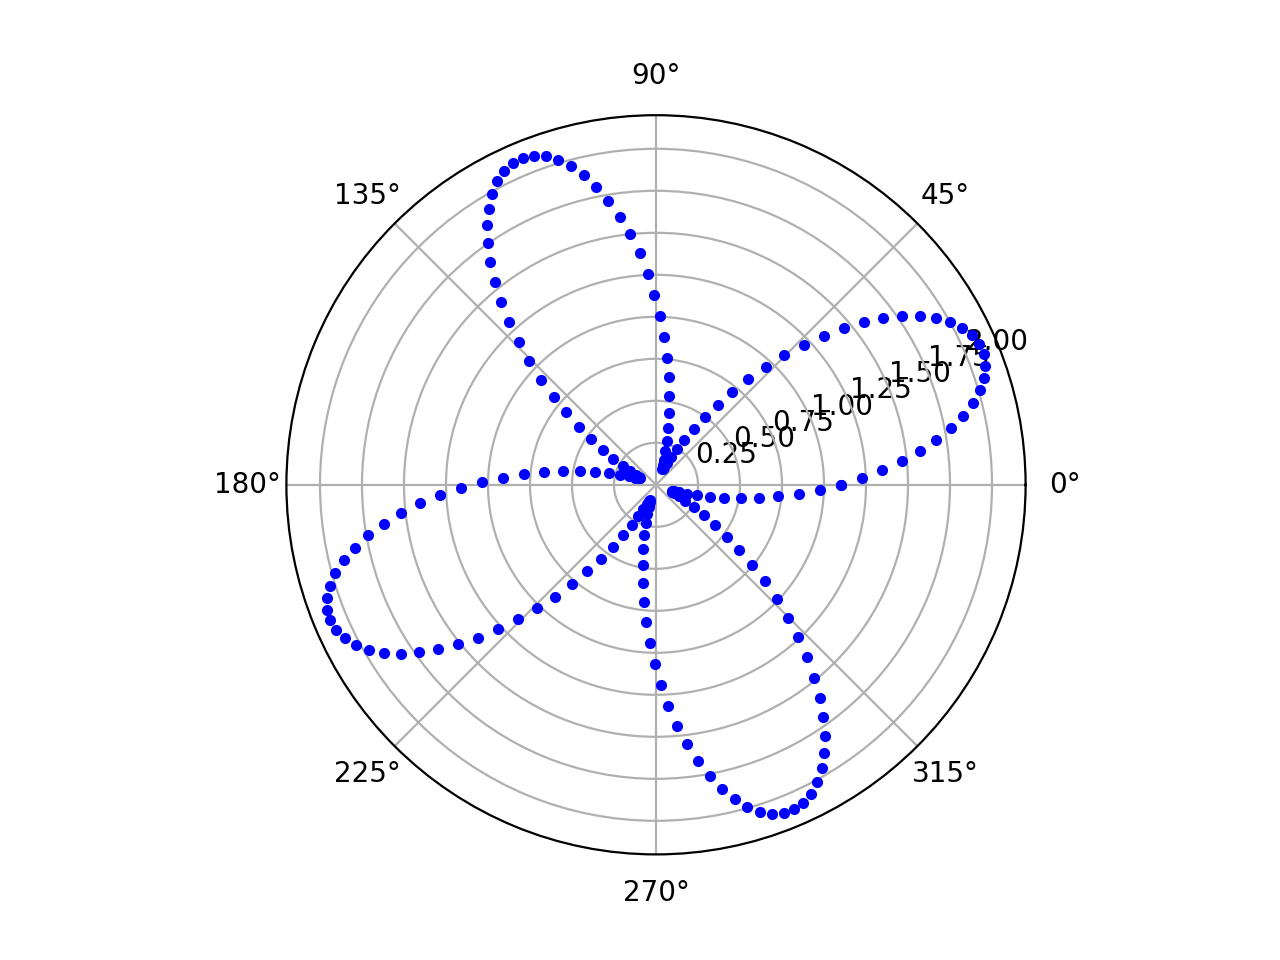

In [44]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2*np.pi, 200)
y = np.sin(4*x)+1.1

plt.ion()

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
im, = ax.plot(x, y, color='b',marker='.',ls='')

for phase in np.linspace(0, 10*np.pi, 50):
    im.set_ydata(np.sin(4*x + phase)+1.1)
    fig.canvas.draw()
    fig.canvas.flush_events()